<h1><center>Boston House Prices</center></h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Boston_-_panoramio_%2823%29.jpg" style="width: 750px;"/>

   ### Introduction

The aim of this project is to analyse the Boston House Prices dataset from the UCI Machine Learning Repository, by firstly using descriptive statistics and plots to describe the Boston House Prices, secondly using inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t and lastly to create a neural network that can predict the median house price based on the other variables in the dataset. 

The Boston Housing Dataset consists of price of houses in various places in Boston. The dataset also includes information on Crime (CRIM), average number of rooms per dwelling (RM), the age of people who own the house (AGE), neighborhoods with more lower class workers (LSTAT) and there are many other variable which can be seen below.This data was collected in 1978 and consists of only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.


### DATA

There are 13 attributes in each case of the dataset. These are:

1. CRIM - per capita crime rate by town
2.  ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3.  INDUS - proportion of non-retail business acres per town.
4.  CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5.  NOX - nitric oxides concentration (parts per 10 million)
6.  RM - average number of rooms per dwelling
7.  AGE - proportion of owner-occupied units built prior to 1940
8.  DIS - weighted distances to five Boston employment centres
9.  RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \\$10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's



### Import Dataset

In [44]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Magic line in plt
%matplotlib inline

# Importing Data
from sklearn.datasets import load_boston 
boston = load_boston()

# Print datasets and attributes
boston.data.shape 


(506, 13)

As we can see there are 506 data rows with 13 attributes

In [54]:
# Converting data from nd-array to dataframe, adding column names & Price Column
data = pd.DataFrame(boston.data) 
data.columns = boston.feature_names 
data['Price'] = boston.target

# Print the first 5 rows of the dataset with four decimal places
data.head(5).round(4) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.0063,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0273,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0273,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0324,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0690,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [61]:
# Run a summary statistics rounding to four deciaml place
data.describe().round(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


The above table gives us a summary of the dataset based on the attributes and price. The result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median [11]. The average house price in 1978 was \\$22,500 while min mean value was \\$5,000 with max mean value of \\$50,000.

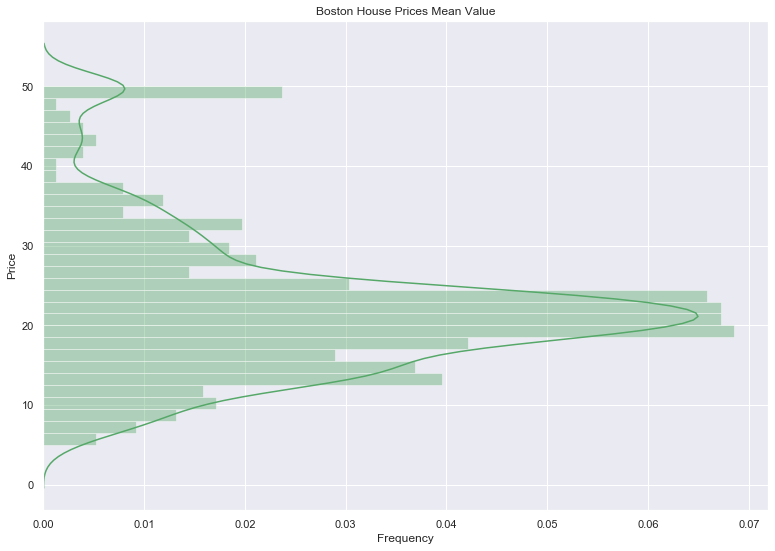

In [62]:
# Use seaborn to create a plot
# use color codes to change color
sns.set_color_codes()

# Re-size the displot
sns.set(rc={'figure.figsize':(13,9)})

# Create a displot to show the 'MEDV'
sns.distplot(data['Price'], bins=30, vertical=True, color="g")

#Title
plt.title("Boston House Prices Mean Value")       

# X -axis description
plt.xlabel("Frequency")

#Print plot
plt.show()

As we can see from the plot above, the majority of the prices are around the \\$20,000 mark with a few outliners in the min and max values.

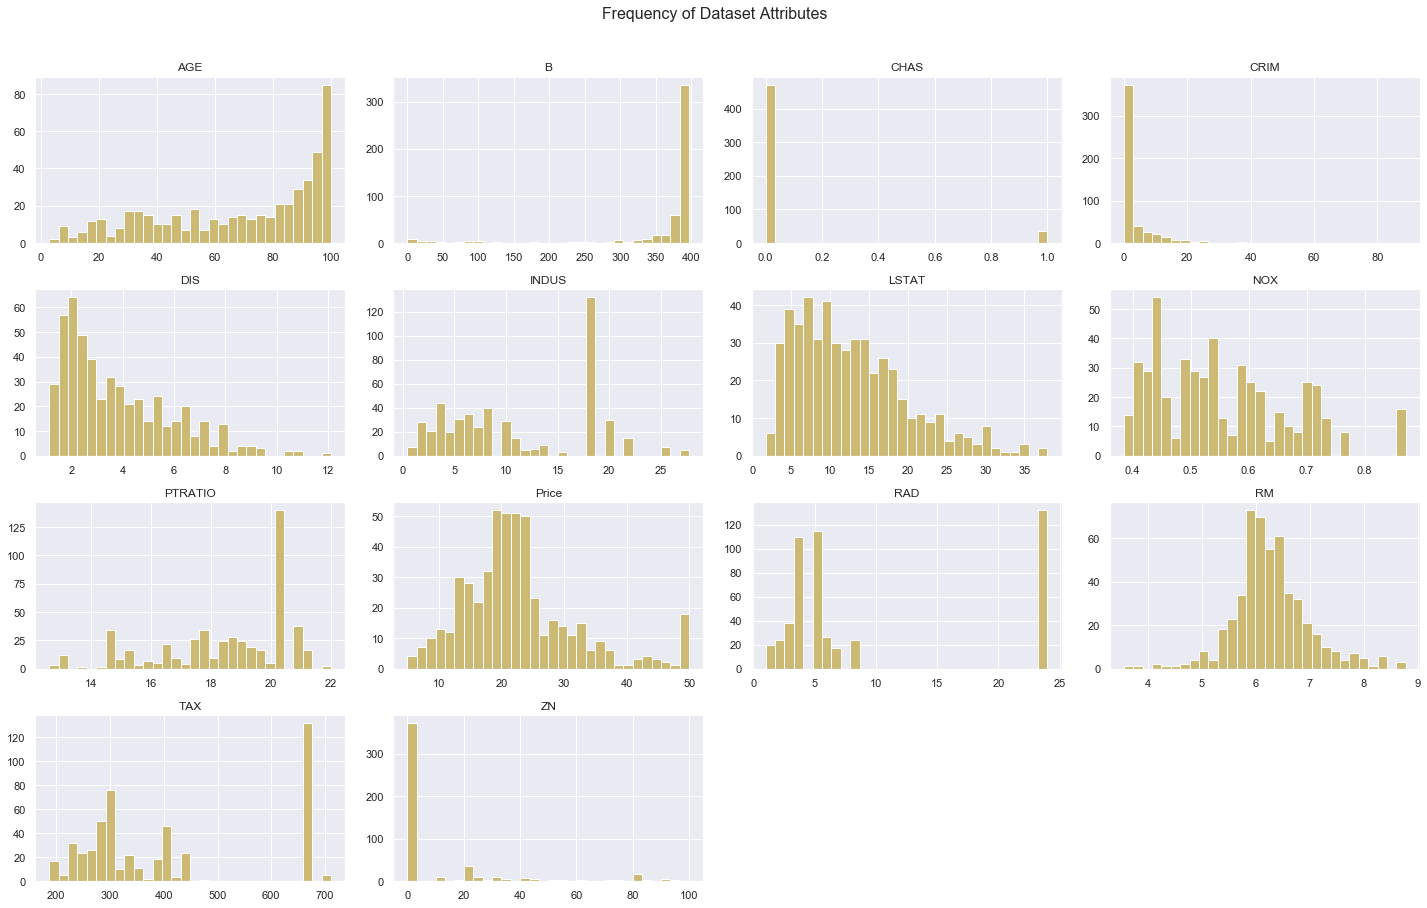

In [98]:
# Create a histogram for 
data.hist(bins=30,figsize=(20,12),grid=True, color='g')

# Title of Histogram
plt.suptitle('Frequency of Dataset Attributes', y=1.05, size=16)
plt.tight_layout()

The above plots a histogram for all attributes and price. It shows the frequency of the values that appear in the dataset. For example, if we look at that attribute CHAS (Charles River dummy variable), we can see that there are two 0 and 1 with the number of properties over 400 not tracting near the river and under 50 tracting near the property.

Next, we will create a correlation matrix. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data usig the seaborn library [12]. The correlation coefficient ranges from -1 to 1. If the value is close to 1, this indicates there is a strong relationship between these two variables an the opposite can be said about if the value is closer to - 1. 

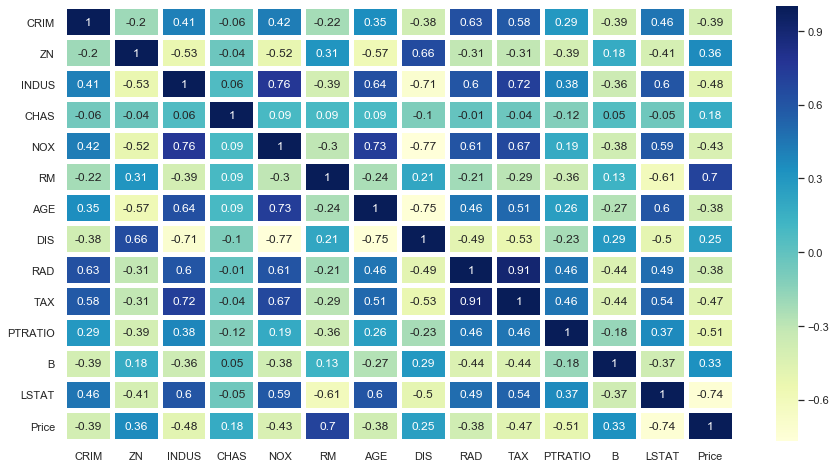

In [99]:
# create a matrix to show the interaction between variables. Round data to 2 deciaml places
correlation_matrix = data.corr().round(2)

# Use annot to input data into square wtth color "YlGnBu"
sns.heatmap(data=correlation_matrix, linewidths=4, annot=True, cmap="YlGnBu")

# Re-size the matrix
sns.set(rc={'figure.figsize':(15,8)})

From the correlation matrix, the number of room per dwelling 'RM' has the biggest positive impact on the price of a house at 0.70. Other's that have a positive impact price include 'ZN' (proportion of residential land zoned for lots over 25,000 sq.ft.) at 0.37, 'CHAS' (Charles River dummy variable) at 0.18 and 'B' (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town) at 0.33.

If you look at the negative impact of the price in the matrix, 'LSTAT' (LSTAT - % lower status of the population) is at -0.74 while 'PTRATIO' is at -0.51.

Let's show these correlations for 'RM' and 'LSTAT' for 'MEDV' by using linear regression. Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable ('RM', 'LSTAT'), and the other is considered to be a dependent ('MEDV') variable [13]. A dependent variable is a particular quantity that we ask a question about in our study. An explanatory variable is any factor that can influence the dependent variable. While there can be many explanatory variables, we will primarily concern ourselves with a single explanatory variable [14].A scatterplot can be a helpful tool in determining the strength of the relationship between two variables.[13]

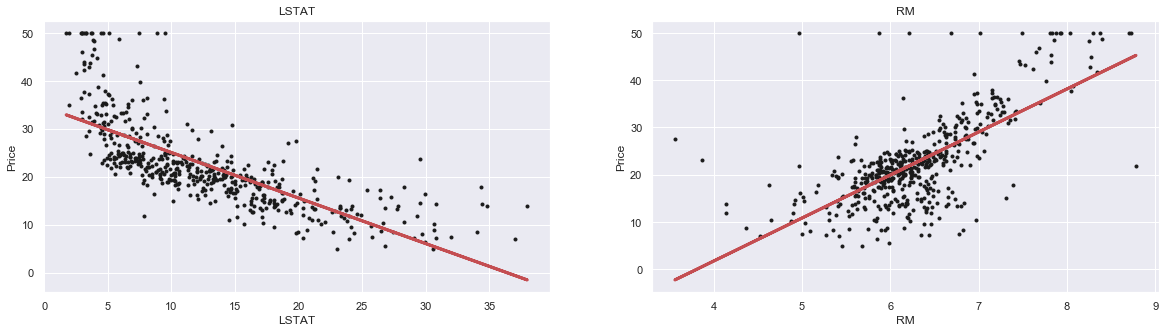

In [128]:
# Size the plot 
plt.figure(figsize=(20, 5))

# Plot for explanatory and dependent variables
explanatory = ['LSTAT', 'RM']
dependent = data['Price']


# Loop over explanatory variables 
for i, col in enumerate(explanatory):
    plt.subplot(1, len(explanatory) , i+1)
    x = data[col]
    y = dependent
    
    # Do regression on the x and y arrays using numpy.
    m, c = np.polyfit(x, y, 1)
    
    # Plot x and y and the regression line in red.
    plt.plot(x, y, 'k.')
    plt.plot(x, m * x + c, 'r-', linewidth=3)
    
    # Title and x and y names
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')  

From the plots, we can see that the prices tend to decrease with more lower class workers (LSTAT - % lower status of the population) as lower class workers would have less money to spend on a home. While prices tend to rise with the increase in rooms in each dwelling (RM) as the more rooms in a house would increase the square footage making larger than one's with less rooms. The same can be said about tax income, if people earn less money it is likely that their home are worth less. 

We created a regression line in our scatterplot which is simply a single line that best fits the data (in terms of having the smallest overall distance from the line to the points). The formula for the best-fitting line (or regression line) is y = mx + c, where m is the slope of the line and c is the y-intercept [14]. 

Inferential statistics use a random sample of data taken from a population to describe and make inferences about the population. Inferential statistics are valuable when examination of each member of an entire population is not convenient or possible. For example, to measure the diameter of each nail that is manufactured in a mill is impractical. 

In [ ]:
# https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html

# https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341

# https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

### References

1. https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

2. https://www.kaggle.com/vikrishnan/boston-house-prices

3. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

5. https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

6. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

7. https://rstudio-pubs-static.s3.amazonaws.com/364346_811c9012a14847428c9b1fc1e956431a.html?source=post_page---------------------------

8. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

9. https://www.kaggle.com/sagarnildass/predicting-boston-house-prices

10. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

11.https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

11. https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras

12. https://www.displayr.com/what-is-a-correlation-matrix/

13. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

14. https://www.dummies.com/education/math/statistics/how-to-calculate-a-regression-line/